In [ ]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
import wget

url = "https://storage.googleapis.com/dataset_deeplearning/CoLeaf_DATASET.zip"
file_name = "CoLeaf_DATASET.zip"

wget.download(url, file_name)

print(f"{file_name} telah berhasil diunduh.")

CoLeaf_DATASET.zip telah berhasil diunduh.


In [ ]:
import zipfile

brain = zipfile.ZipFile('CoLeaf_DATASET.zip')
brain.extractall('/content')
brain.close()

In [ ]:
import os
import shutil

# Direktori sumber data
source_data_dir = 'CoLeaf_DATASET'
# Direktori tujuan data pelatihan
train_data_dir = 'train'
# Direktori tujuan data pengujian
valid_data_dir = 'test'

# Persentase data untuk pelatihan
train_split = 0.7

# Membuat direktori data pelatihan jika belum ada
if not os.path.exists(train_data_dir):
    os.makedirs(train_data_dir)

# Membuat direktori data pengujian jika belum ada
if not os.path.exists(valid_data_dir):
    os.makedirs(valid_data_dir)

# Loop melalui setiap direktori kelas di sumber data
for class_dir in os.listdir(source_data_dir):
    # Path ke direktori kelas dalam sumber data
    class_path = os.path.join(source_data_dir, class_dir)

    # Mendapatkan daftar file dalam direktori kelas
    files = os.listdir(class_path)

    # Menentukan berapa banyak data akan digunakan untuk pelatihan
    train_size = int(train_split * len(files))

    # Memindahkan file ke direktori pelatihan atau pengujian berdasarkan persentase
    for i, file in enumerate(files):
        source_file = os.path.join(class_path, file)

        if i < train_size:
            destination_dir = train_data_dir
        else:
            destination_dir = valid_data_dir

        destination_file = os.path.join(destination_dir, class_dir, file)

        # Membuat direktori kelas jika belum ada
        if not os.path.exists(os.path.join(destination_dir, class_dir)):
            os.makedirs(os.path.join(destination_dir, class_dir))

        # Memindahkan file
        shutil.move(source_file, destination_file)

print("Pemisahan data selesai.")


Pemisahan data selesai.


In [ ]:
''' train and test path '''
train_path = 'train'
test_path = 'test'

In [ ]:
File=[]
for f in os.listdir(train_path):
    File += [f]

'''  total number of classes '''
print(File)

['manganese-Mn', 'magnesium-Mg', 'potasium-K', 'more-deficiencies', 'calcium-Ca', 'boron-B', 'iron-Fe', 'nitrogen-N', 'healthy', 'phosphorus-P']


In [ ]:
''' reading images '''

train_data = []

''' label encoding '''

mapping={'potasium-K':0, 'nitrogen-N':1, 'more-deficiencies':2, 'calcium-Ca':3, 'iron-Fe':4, 'magnesium-Mg':5, 'manganese-Mn':6, 'healthy':7, 'boron-B':8, 'phosphorus-P':9}

count=0

for f in os.listdir(train_path):
    ''' joining path '''
    path = os.path.join(train_path, f)
    for im in os.listdir(path):
        ''' loading an image '''
        img = load_img(os.path.join(path, im), grayscale=False, color_mode='rgb', target_size=(150,150))
        ''' converting an image to array '''
        img = img_to_array(img)
        ''' scaling  '''
        img = img / 255.0
        ''' appending image to train_data '''
        train_data.append([img, count])
    count=count+1

In [ ]:
test_data = []

''' label encoding '''

mapping={'potasium-K':0, 'nitrogen-N':1, 'more-deficiencies':2, 'calcium-Ca':3, 'iron-Fe':4, 'magnesium-Mg':5, 'manganese-Mn':6, 'healthy':7, 'boron-B':8, 'phosphorus-P':9}

count=0

for f in os.listdir(test_path):
    ''' joining path '''
    path=os.path.join(test_path, f)
    for im in os.listdir(path):
        ''' loading an image '''
        img = load_img(os.path.join(path, im), grayscale=False, color_mode='rgb', target_size=(150,150))
        ''' converting an image to array '''
        img = img_to_array(img)
        ''' scaling '''
        img = img/255.0
        ''' appending an image to test_data'''
        test_data.append([img, count])
    count=count+1

In [ ]:
train_images, train_labels = zip(*train_data)
test_images, tese_labels = zip(*test_data)

In [ ]:
''' converting labels into to_categorical '''
train_labels = to_categorical(train_labels)

''' coverting train_images into numpy array '''
train_images = np.array(train_images)

''' converting train_labesl into numpy array '''
train_labels = np.array(train_labels)

''' shaep of train_images and train_labels '''
print(train_images.shape)
print(train_labels.shape)

(800, 150, 150, 3)
(800, 10)


In [ ]:
''' converting labels into to_categorical '''
test_labels = to_categorical(tese_labels)

''' coverting test_images into numpy array '''
test_images = np.array(test_images)

''' converting train_labesl into numpy array '''
test_labels = np.array(test_labels)

''' shaep of test_images and test_labels '''
print(test_images.shape)
print(test_labels.shape)

(306, 150, 150, 3)
(306, 10)


In [ ]:
''' reshaping images '''
train_images = train_images.reshape(-1,150,150,3)
test_images = test_images.reshape(-1,150,150,3)

In [ ]:
''' train test split '''
X_train, X_test, y_train, y_test = train_test_split(train_images,train_labels, test_size=0.3,random_state=44)

In [ ]:
''' shape of X_train, X_test, y_train, y_test '''
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(560, 150, 150, 3)
(240, 150, 150, 3)
(560, 10)
(240, 10)


In [ ]:
''' data Augmentation '''
data_aug = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=20, zoom_range=0.2,
                    width_shift_range=0.2, height_shift_range=0.2, shear_range=0.1, fill_mode="nearest")

In [ ]:
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# # Load the VGG16 model
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
# num_classes = 10

# # Add custom layers for your specific task (classification)
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# # x = Dropout(0.5)(x)  # Add dropout
# predictions = Dense(num_classes, activation='softmax')(x)

# # Create the final model
# vgg16_model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# # Compile the model
# vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Print the model summary
# vgg16_model.summary()


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.regularizers import l2

# Define input shape and number of classes
input_shape = (150, 150, 3)  # Adjust input shape as needed
num_classes = 10  # Adjust the number of classes based on your dataset

# Create the Inception V3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom layers for your specific task (classification)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1000, activation='relu', kernel_regularizer=l2(0.01))(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
inceptionv3_model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
inceptionv3_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
inceptionv3_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalization[0]

Total Params: Ini adalah jumlah total parameter dalam model, yaitu 23.861.794. Parameter adalah variabel yang digunakan oleh model untuk membuat prediksi atau belajar dari data. Dalam jaringan saraf, parameter termasuk bobot dan bias di lapisan-lapisan.

Trainable Params: Ini adalah parameter dalam model yang dapat diperbarui atau "dilatih" selama proses pelatihan. Dalam kasus Anda, terdapat 23.827.362 parameter yang dapat dilatih. Ini adalah parameter yang diatur oleh model selama pelatihan untuk meminimalkan fungsi kerugian dan membuat prediksi yang lebih akurat.

Non-trainable Params: Ini adalah parameter dalam model yang tidak diperbarui selama pelatihan. Mereka biasanya tetap dan mungkin termasuk hal-hal seperti embedding atau konstanta lain yang diperlukan agar model berfungsi dengan baik. Dalam kasus Anda, terdapat 34.432 parameter yang tidak dapat dilatih.

Ukuran model dalam hal memori juga ditunjukkan:

Total Size: Ukuran total model adalah 91,03 megabita (MB), yang merupakan ukuran gabungan dari parameter yang dapat dilatih dan parameter yang tidak dapat dilatih.

Trainable Size: Ukuran model karena parameter yang dapat dilatih adalah 90,89 MB.

Non-trainable Size: Ukuran model karena parameter yang tidak dapat dilatih adalah 134,50 kilobita (KB).

In [ ]:
from keras.callbacks import History
history = History()

In [ ]:
# Training the model vgg16_model
History = inceptionv3_model.fit(data_aug.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=10,callbacks=[history])

Epoch 1/10
18/18 [==============================] - 28s 730ms/step - loss: 13.8623 - accuracy: 0.2875 - val_loss: 21.4297 - val_accuracy: 0.0417
Epoch 2/10
18/18 [==============================] - 12s 649ms/step - loss: 8.7837 - accuracy: 0.4232 - val_loss: 23.7321 - val_accuracy: 0.2875
Epoch 3/10
18/18 [==============================] - 12s 668ms/step - loss: 5.7399 - accuracy: 0.4946 - val_loss: 78.0250 - val_accuracy: 0.3542
Epoch 4/10
18/18 [==============================] - 12s 656ms/step - loss: 3.8667 - accuracy: 0.5000 - val_loss: 36.1553 - val_accuracy: 0.3333
Epoch 5/10
18/18 [==============================] - 12s 651ms/step - loss: 2.8639 - accuracy: 0.5304 - val_loss: 4.0474 - val_accuracy: 0.3083
Epoch 6/10
18/18 [==============================] - 12s 652ms/step - loss: 2.3777 - accuracy: 0.5179 - val_loss: 2.5698 - val_accuracy: 0.4042
Epoch 7/10
18/18 [==============================] - 12s 651ms/step - loss: 1.8600 - accuracy: 0.5500 - val_loss: 2.6152 - val_accuracy: 0

# Evaluasi Kinerja model

In [ ]:
''' prediction '''
y_pred= inceptionv3_model.predict(X_test)

''' retreiving max val from predicted values '''
pred = np.argmax(y_pred,axis=1)

''' retreiving max val from actual values '''
ground = np.argmax(y_test,axis=1)

''' classificaion report '''
print(classification_report(ground,pred))

8/8 [==============================] - 2s 141ms/step
              precision    recall  f1-score   support

           0       0.50      0.05      0.09        21
           1       0.43      0.13      0.20        23
           2       0.67      0.55      0.60        22
           3       0.00      0.00      0.00        28
           4       0.78      0.39      0.52        36
           5       0.28      0.96      0.44        25
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00         3
           9       0.59      0.95      0.73        65

    accuracy                           0.48       240
   macro avg       0.32      0.30      0.26       240
weighted avg       0.45      0.48      0.40       240



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Akurasi (Accuracy): Akurasi adalah sejauh mana model secara keseluruhan melakukan klasifikasi dengan benar. Akurasi adalah 0.48, yang berarti model Anda secara keseluruhan benar dalam 48% dari prediksi.

Rata-rata Makro (Macro Avg): Rata-rata metrik presisi, recall, dan F1-score untuk semua kelas. Nilai ini memberikan gambaran umum tentang kinerja model secara keseluruhan. Untuk metrik makro ini, presisi rata-rata adalah 0.32, recall rata-rata adalah 0.30, dan F1-score rata-rata adalah 0.26.

Rata-rata Terimbang (Weighted Avg): Rata-rata metrik dengan memberikan bobot lebih besar pada kelas yang lebih banyak memiliki sampel. Ini berguna jika distribusi kelas dalam data Anda tidak seimbang. Untuk metrik terimbang ini, presisi rata-rata adalah 0.45, recall rata-rata adalah 0.48, dan F1-score rata-rata adalah 0.40.

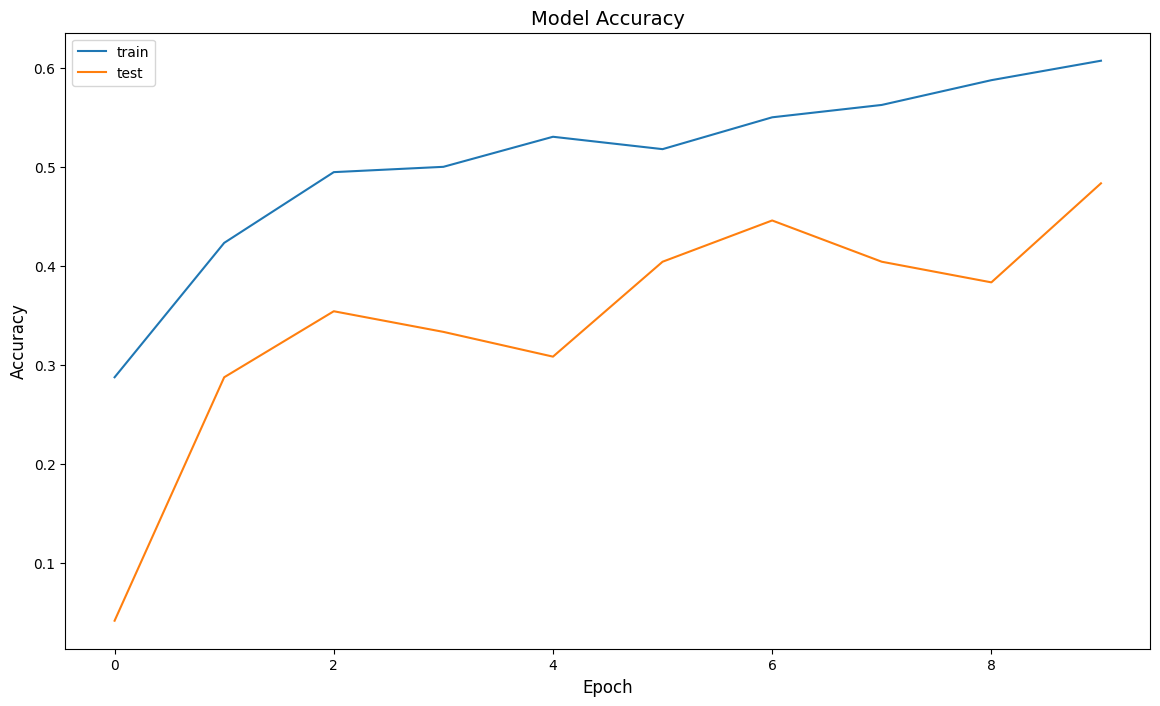

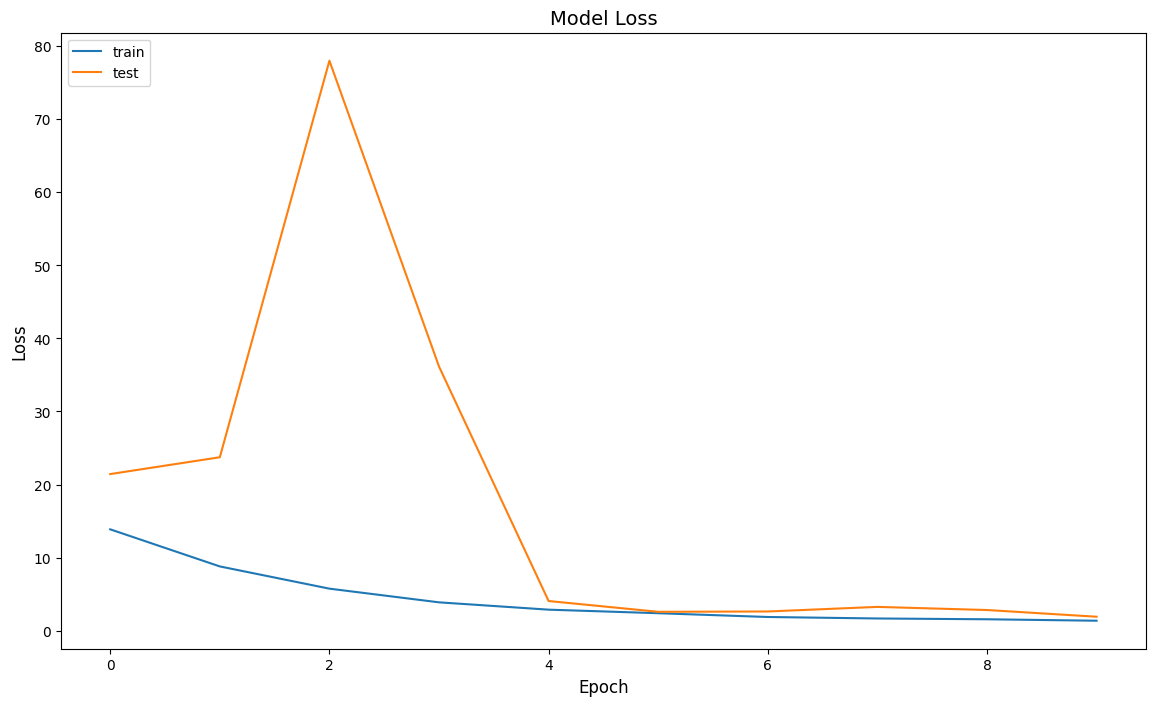

In [ ]:
# Plotting accuracy and loss curves
plt.figure(figsize=(14, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Interpretasi Grafik Akurasi:**

* Pada awal pelatihan (Epoch 1), baik akurasi pelatihan maupun akurasi validasi rendah. Ini adalah kondisi awal di mana model belum belajar dengan baik.

* Seiring berjalannya waktu, akurasi pelatihan terus meningkat. Ini menunjukkan bahwa model semakin baik dalam memprediksi data pelatihan.

* Namun, akurasi validasi memiliki tren yang berbeda. Pada beberapa epoch awal, akurasi validasi meningkat, tetapi kemudian, pada beberapa epoch berikutnya, akurasi validasi cenderung stagnan atau bahkan menurun. Ini adalah indikasi overfitting, di mana model mulai menghafal data pelatihan dan tidak mampu menggeneralisasi dengan baik ke data baru.

**Interpretasi Grafik Loss:**

* Pada awal pelatihan (Epoch 1), baik kerugian pelatihan maupun kerugian validasi tinggi. Ini menunjukkan bahwa model awalnya memiliki kesalahan yang tinggi dalam prediksi.

* Kerugian pelatihan mulai berkurang seiring berjalannya waktu, yang menunjukkan bahwa model belajar dari data pelatihan dan membuat prediksi yang lebih baik.

* Namun, kerugian validasi memiliki tren yang berbeda. Setelah beberapa epoch, kerugian validasi mulai meningkat secara signifikan. Ini juga merupakan indikasi overfitting.

Enter the number of images you want to predict: 4
Enter the path of image 1: /content/test/boron-B/B (12).jpg
Enter the path of image 2: /content/test/magnesium-Mg/Mg (13).jpg
Enter the path of image 3: /content/test/iron-Fe/Fe (10).jpg
Enter the path of image 4: /content/test/healthy/Healthy (6).jpg
1/1 [==============================] - 0s 41ms/step


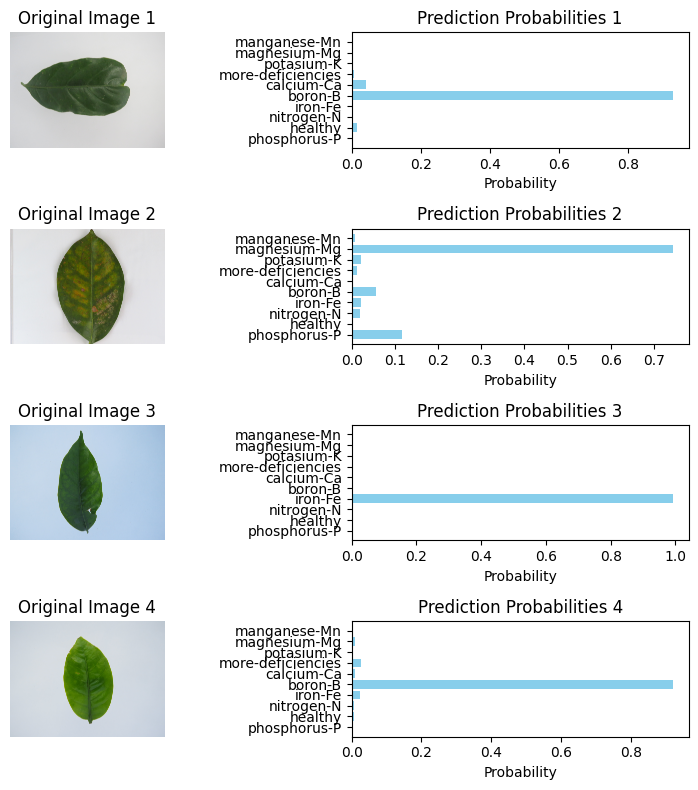

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Function to load and process an image
def load_and_process_image(image_path):
    image = Image.open(image_path)
    image = image.convert("RGB")
    image = image.resize((180, 180))  # Sesuaikan dengan ukuran input model Anda
    image = np.array(image)
    image = image / 255.0
    return image

# Function to predict images
def predict_images(model, image_paths):
    predictions = []
    for image_path in image_paths:
        image = load_and_process_image(image_path)
        prediction = model.predict(np.expand_dims(image, axis=0))
        predictions.append(prediction)
    return predictions

# Load the pre-trained model
model = inceptionv3_model  # Ganti dengan model Anda

# Meminta pengguna untuk memasukkan jalur gambar
num_images = int(input("Enter the number of images you want to predict: "))
image_paths = []
for i in range(num_images):
    image_path = input(f"Enter the path of image {i + 1}: ")
    image_paths.append(image_path)

# Lakukan prediksi
predictions = predict_images(model, image_paths)

# Menampilkan gambar asli
plt.figure(figsize=(8, 8))
for i in range(num_images):
    image = Image.open(image_paths[i])
    plt.subplot(num_images, 2, i * 2 + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Original Image {i + 1}')

    # Tentukan label kelas (gantilah dengan nama kelas Anda)
    classes = ['manganese-Mn', 'magnesium-Mg', 'potasium-K', 'more-deficiencies', 'calcium-Ca', 'boron-B', 'iron-Fe', 'nitrogen-N', 'healthy', 'phosphorus-P']  # Gantilah dengan nama kelas yang sesuai

    # Tampilkan probabilitas prediksi sebagai diagram batang
    plt.subplot(num_images, 2, i * 2 + 2)
    plt.barh(classes, predictions[i][0], color='skyblue')
    plt.xlabel('Probability')
    plt.title(f'Prediction Probabilities {i + 1}')
    plt.gca().invert_yaxis()  # Balikkan sumbu y untuk visualisasi yang lebih baik

plt.tight_layout()
plt.show()


Enter the path of the folder containing images: /content/test_prediksi
1/1 [==============================] - 0s 41ms/step


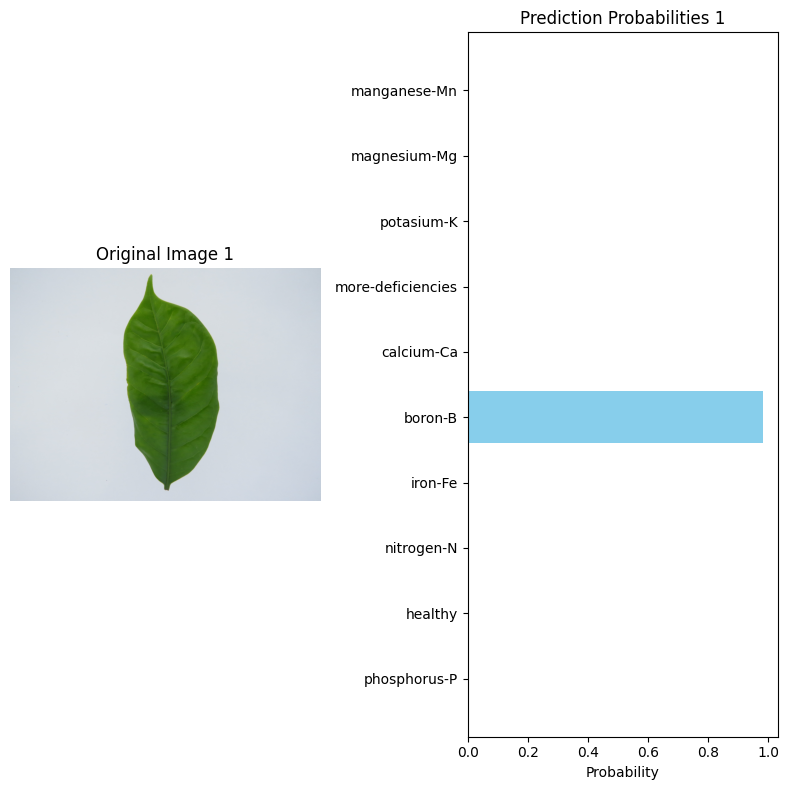

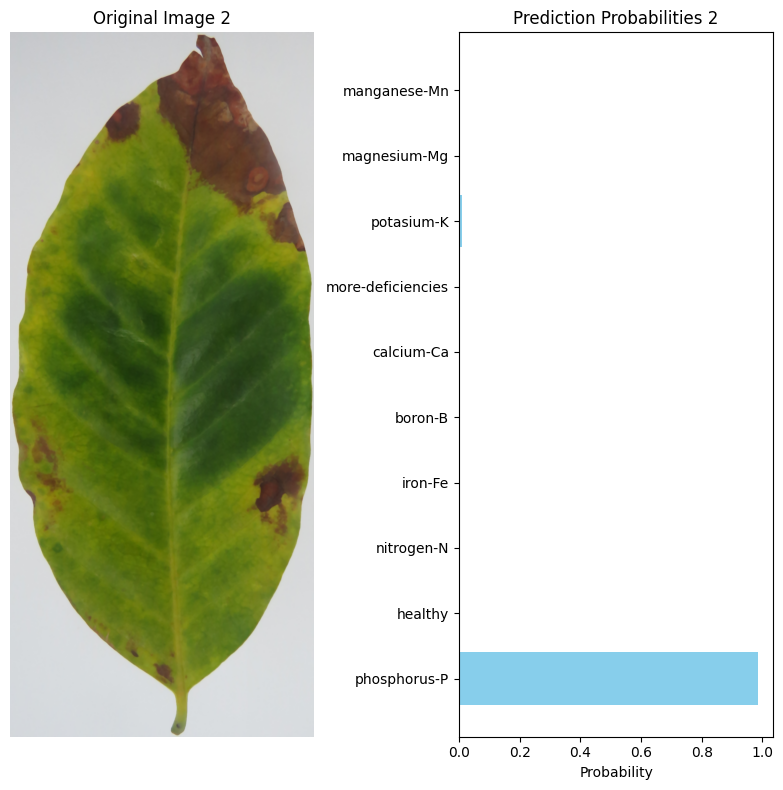

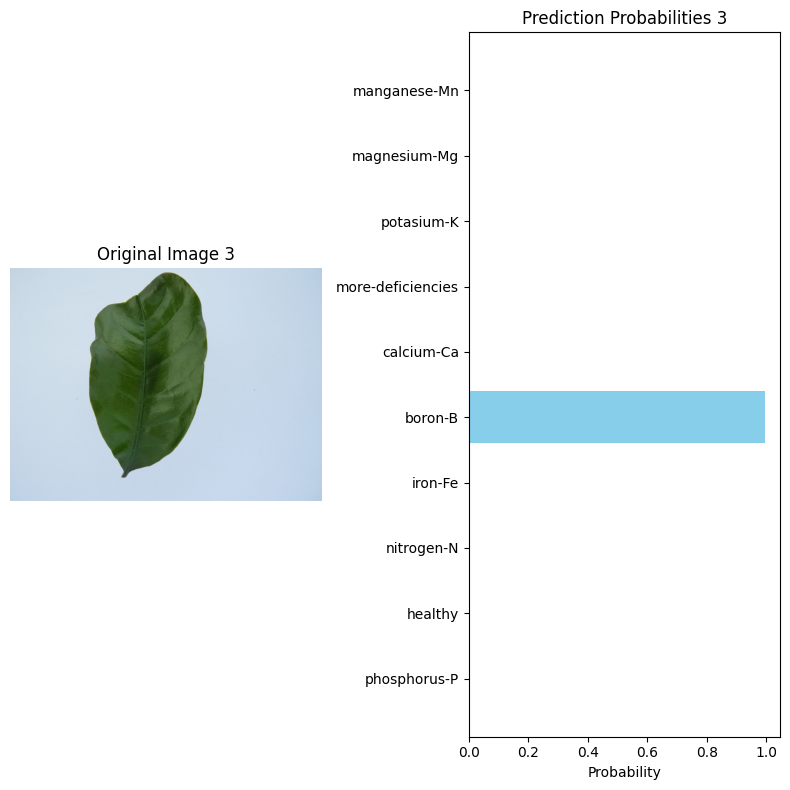

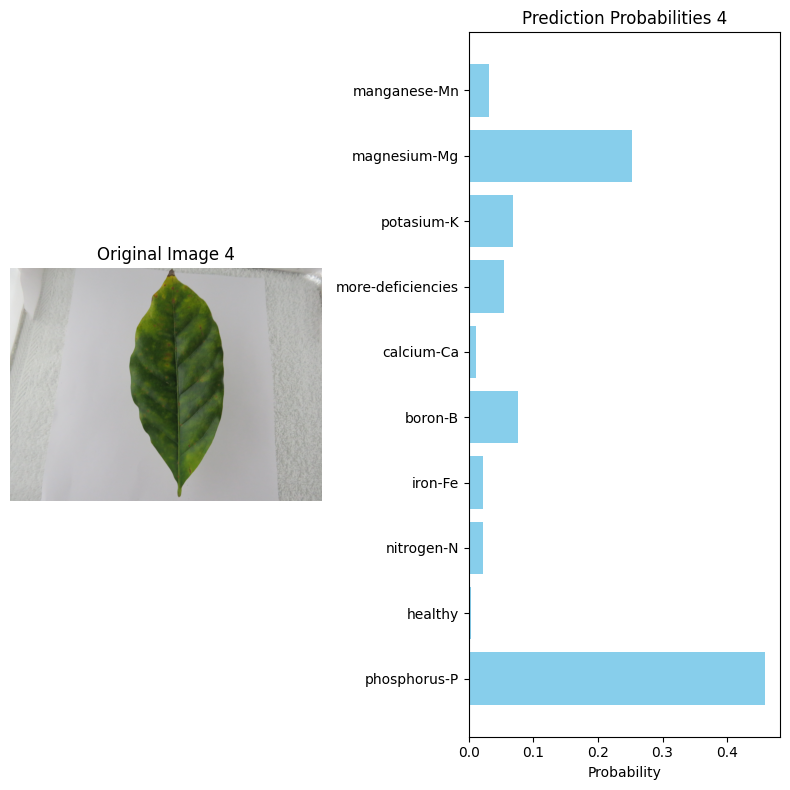

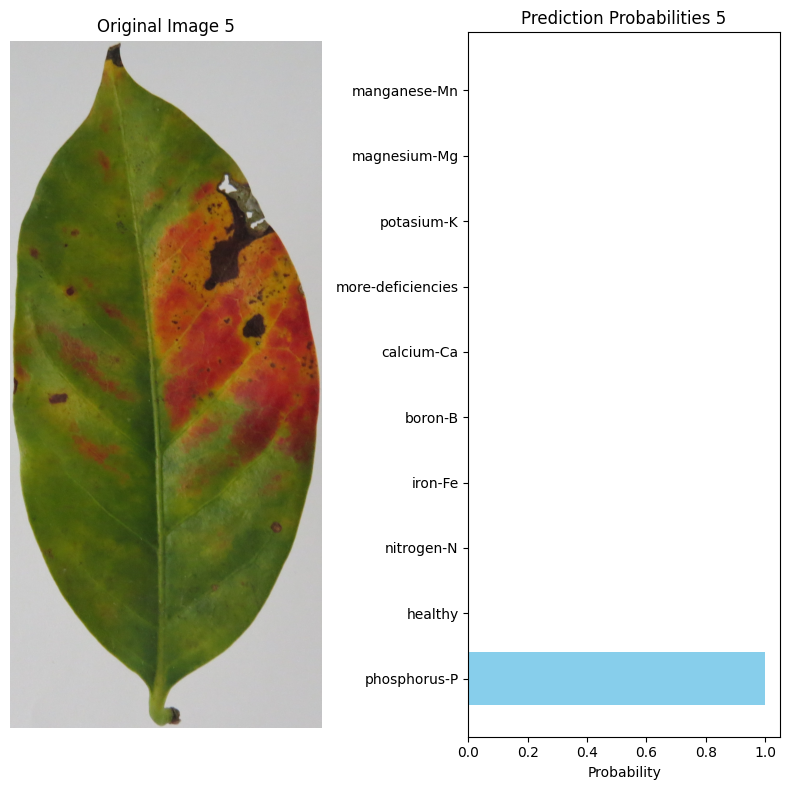

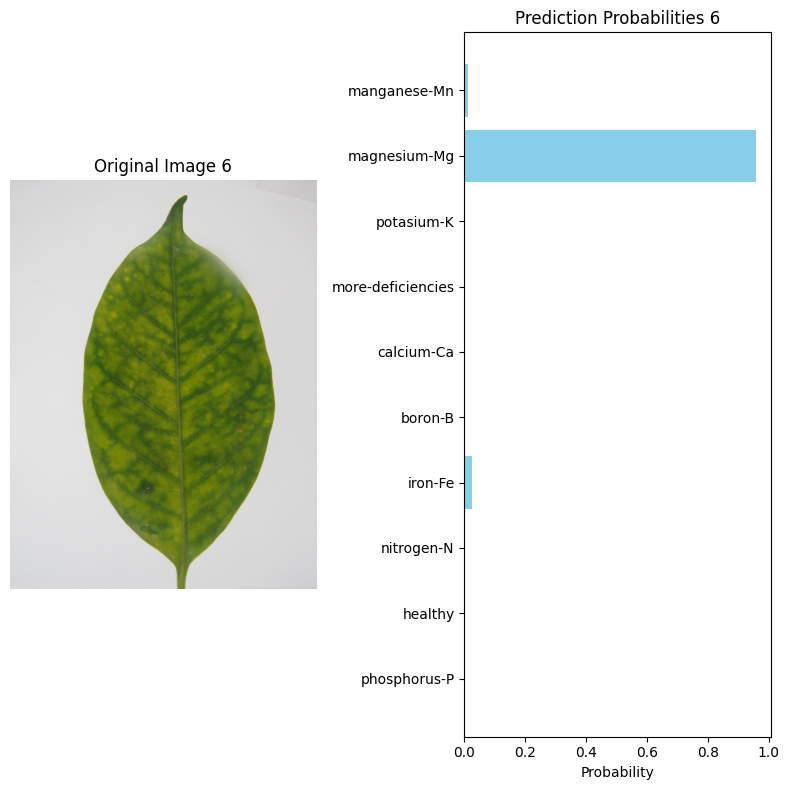

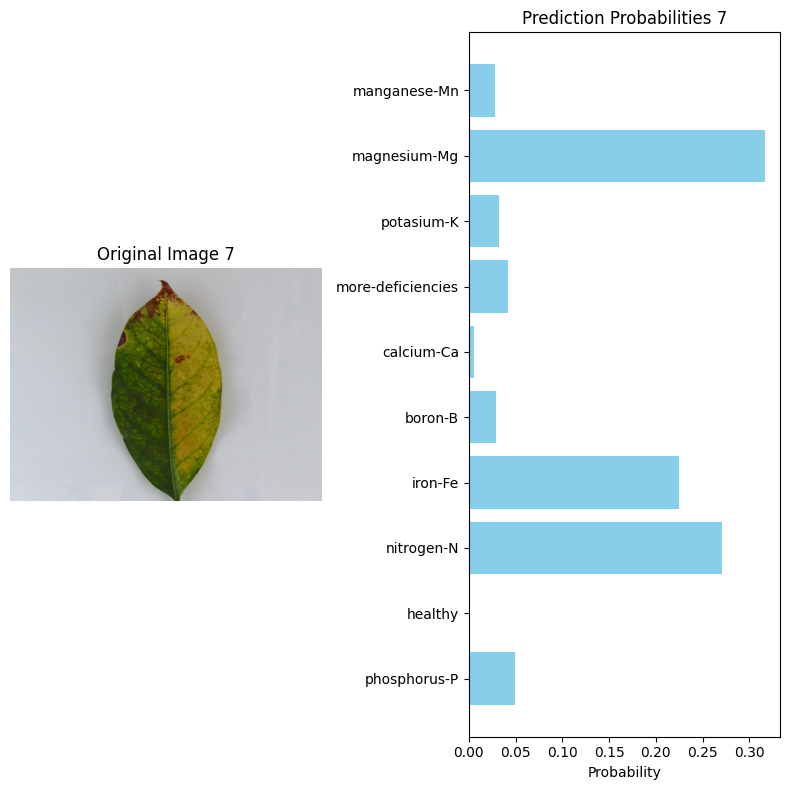

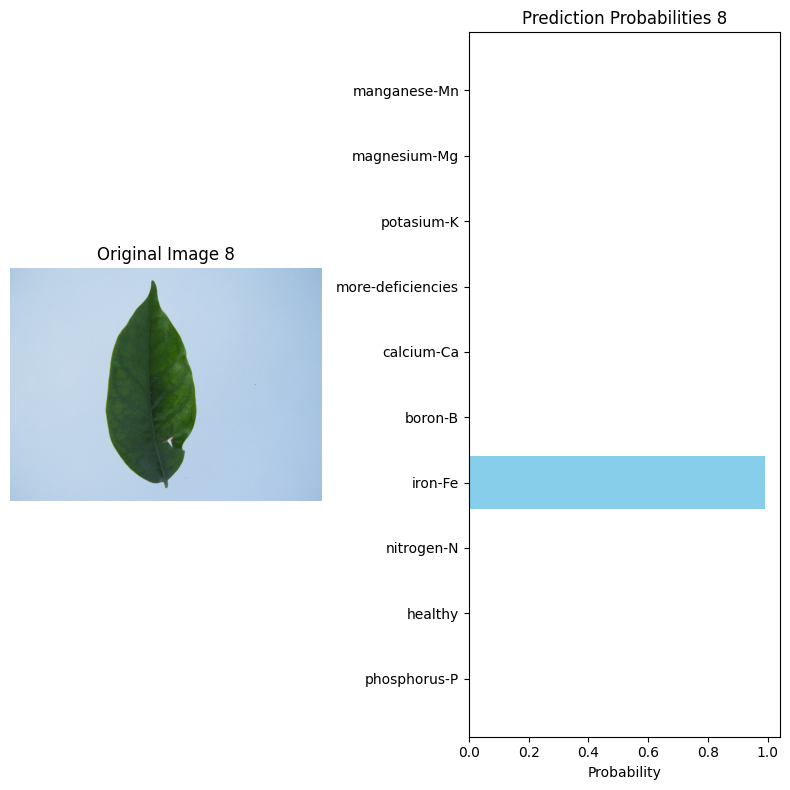

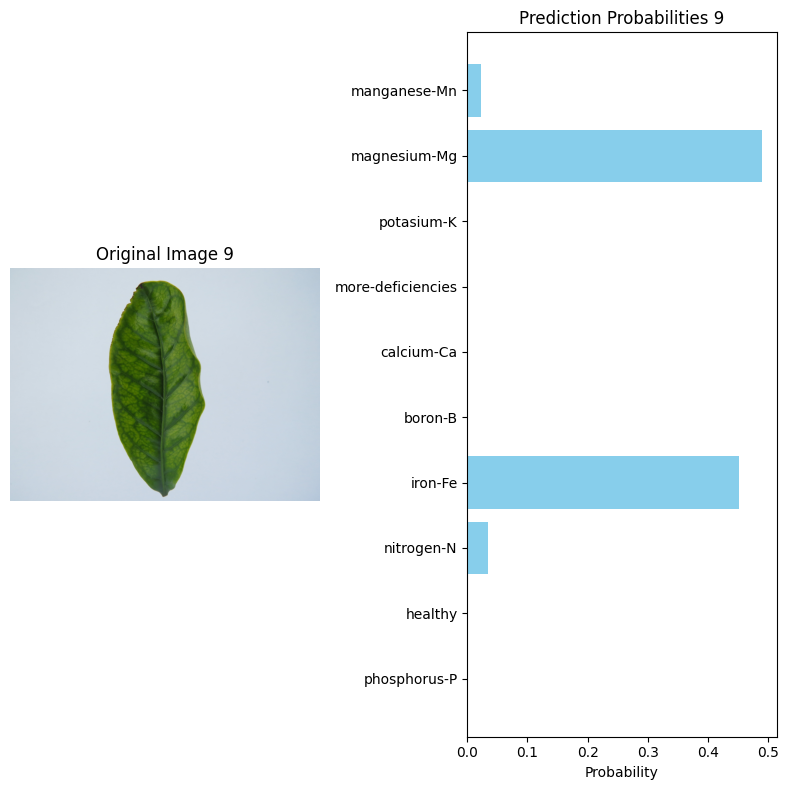

In [ ]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Function to load and process an image
def load_and_process_image(image_path):
    image = Image.open(image_path)
    image = image.convert("RGB")
    image = image.resize((180, 180))  # Sesuaikan dengan ukuran input model Anda
    image = np.array(image)
    image = image / 255.0
    return image

# Function to predict images in a folder
def predict_images_in_folder(model, folder_path):
    image_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith(('.jpg', '.jpeg', '.png'))]
    predictions = []
    for image_path in image_paths:
        image = load_and_process_image(image_path)
        prediction = model.predict(np.expand_dims(image, axis=0))
        predictions.append(prediction)
    return image_paths, predictions

# Load the pre-trained model
model = inceptionv3_model  # Ganti dengan model Anda

# Meminta pengguna untuk memasukkan jalur folder yang berisi gambar
folder_path = input("Enter the path of the folder containing images: ")

# Lakukan prediksi
image_paths, predictions = predict_images_in_folder(model, folder_path)

# Menampilkan hasil prediksi untuk setiap gambar
for i in range(len(image_paths)):
    image = Image.open(image_paths[i])
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Original Image {i + 1}')

    # Tentukan label kelas (gantilah dengan nama kelas Anda)
    classes = ['manganese-Mn', 'magnesium-Mg', 'potasium-K', 'more-deficiencies', 'calcium-Ca', 'boron-B', 'iron-Fe', 'nitrogen-N', 'healthy', 'phosphorus-P']  # Gantilah dengan nama kelas yang sesuai

    # Tampilkan probabilitas prediksi sebagai diagram batang
    plt.subplot(1, 2, 2)
    plt.barh(classes, predictions[i][0], color='skyblue')
    plt.xlabel('Probability')
    plt.title(f'Prediction Probabilities {i + 1}')
    plt.gca().invert_yaxis()  # Balikkan sumbu y untuk visualisasi yang lebih baik

    plt.tight_layout()
    plt.show()


Enter the path of the image you want to predict: /content/test/boron-B/B (11).jpg
1/1 [==============================] - 0s 39ms/step


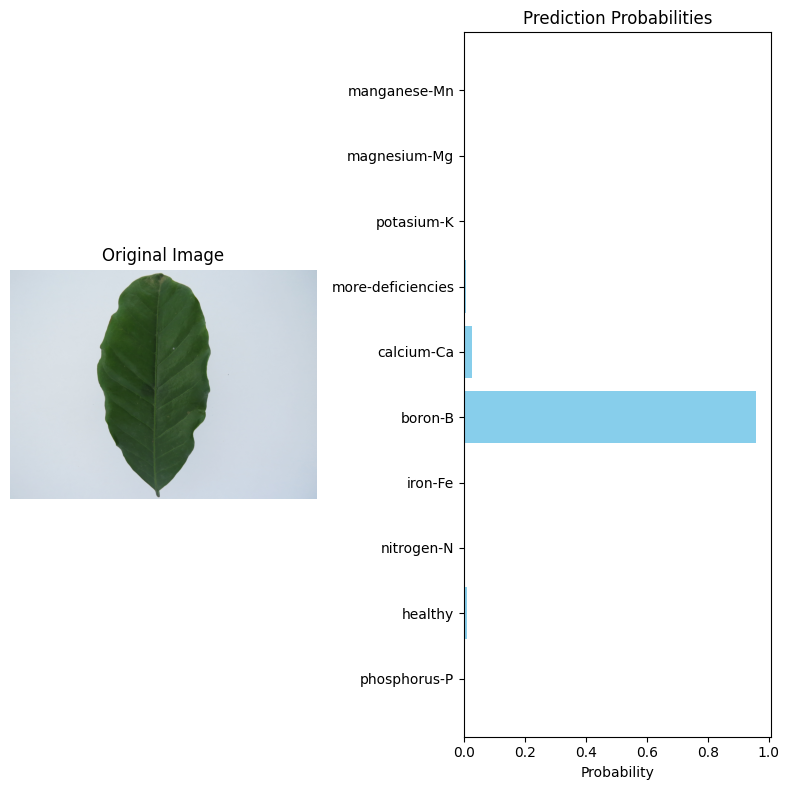

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Function to load and process an image
def load_and_process_image(image_path):
    image = Image.open(image_path)
    image = image.convert("RGB")
    image = image.resize((150, 150))  # Adjust to match your model's input size
    image = np.array(image)
    image = image / 255.0
    return image

# Function to predict the image
def predict_image(model, image_path):
    image = load_and_process_image(image_path)
    prediction = model.predict(np.expand_dims(image, axis=0))
    return prediction

# Load the pre-trained model
model = inceptionv3_model #vgg16_model  # Replace with your model

# Ask the user to enter the image path
image_path = input("Enter the path of the image you want to predict: ")

# Perform prediction
prediction = predict_image(model, image_path)

# Display the original image
image = Image.open(image_path)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')

# Define class labels (replace with your class names)
classes = ['manganese-Mn', 'magnesium-Mg', 'potasium-K', 'more-deficiencies', 'calcium-Ca', 'boron-B', 'iron-Fe', 'nitrogen-N', 'healthy', 'phosphorus-P']  # Gantilah dengan nama kelas yang sesuai

# Display the prediction probabilities as a bar chart
plt.subplot(1, 2, 2)
plt.barh(classes, prediction[0], color='skyblue')
plt.xlabel('Probability')
plt.title('Prediction Probabilities')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.tight_layout()

plt.show()
